In [7]:
import scipy as sc
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from scipy.io import loadmat
from sklearn import preprocessing
%matplotlib inline
sns.set()
sns.set_style('white')

(50, 2)

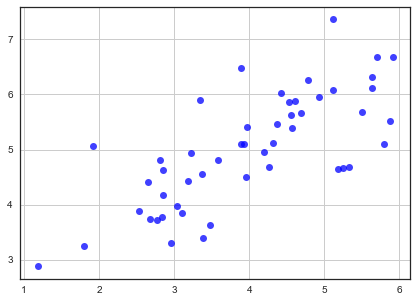

In [17]:
data1 = loadmat('ex7data1.mat')
X = data1['X']
plt.figure(figsize = (7, 5))
plt.plot(X[:, 0], X[:, 1], 'o', color = 'b', alpha=0.75)
plt.grid(True)

In [73]:
def normalizer (x):
    return preprocessing.scale(x)

In [74]:
def covariance (x):
    return np.cov(x)

In [75]:
def SVD (x):
    return sc.linalg.svd(x)

In [88]:
normalX = normalizer(X)
covarianceX = covariance(normalX.T)
U, S, V = SVD(covarianceX)